In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

df = pd.read_csv("C:\\Users\giahu\OneDrive\Desktop\Stress-Lysis.csv")

In [2]:
df.head()

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Humidity,2001.0,20.000000,5.777833,10.0,15.0,20.0,25.0,30.0
Temperature,2001.0,89.000000,5.777833,79.0,84.0,89.0,94.0,99.0
Step count,2001.0,100.141429,58.182948,0.0,50.0,101.0,150.0,200.0
Stress Level,2001.0,1.104448,0.771094,0.0,0.0,1.0,2.0,2.0


C:\Users\giahu\AppData\Local\Temp/ipykernel_25528/3378859371.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

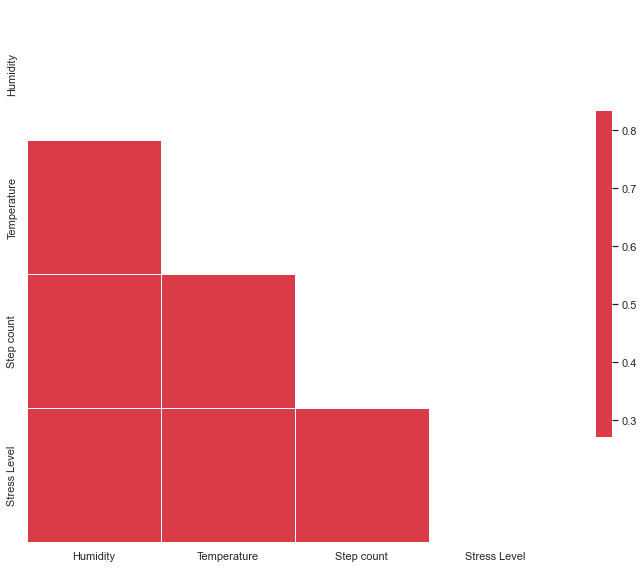

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
#Correlation
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

C:\Users\giahu\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


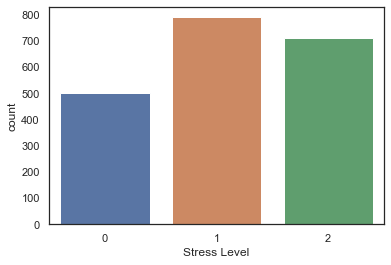

In [5]:
#lets check count of Stress
sns.countplot(df["Stress Level"])
plt.show()

In [55]:
from sklearn.model_selection import train_test_split
x=df.drop(['Stress Level'],axis=1)
y=df['Stress Level']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, stratify=y, random_state=42)

x_train.shape

(1500, 3)

In [56]:
x_test.shape

(501, 3)

In [7]:
#scale dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train= sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
model = Sequential()
model.add(Dense(256, input_dim=3, activation= 'relu'))
model.add(Dense(256,activation= 'relu'))
model.add(Dense(128,activation= 'relu'))
model.add(Dense(32,activation= 'relu'))
model.add(Dense(10,activation= 'relu'))

model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 104,170
Trainable params: 104,170
Non-trainable params: 0
_________________________________________________________________


In [10]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="dnn/best_ratings.hdf5", verbose=0, save_best_only=True)

model.fit(x_train, y_train, validation_data=(x_test, y_test), callbacks=[monitor,checkpointer], verbose=2, epochs=100)



Epoch 1/100
47/47 - 1s - loss: 0.5103 - accuracy: 0.8533 - val_loss: 0.1851 - val_accuracy: 0.9301
Epoch 2/100
47/47 - 0s - loss: 0.3212 - accuracy: 0.9153 - val_loss: 0.4545 - val_accuracy: 0.9122
Epoch 3/100
47/47 - 0s - loss: 0.1260 - accuracy: 0.9680 - val_loss: 0.0440 - val_accuracy: 0.9900
Epoch 4/100
47/47 - 0s - loss: 0.7215 - accuracy: 0.8533 - val_loss: 0.2929 - val_accuracy: 0.7425
Epoch 5/100
47/47 - 0s - loss: 0.2373 - accuracy: 0.8560 - val_loss: 0.1407 - val_accuracy: 0.9541
Epoch 6/100
47/47 - 0s - loss: 0.0802 - accuracy: 0.9693 - val_loss: 0.1927 - val_accuracy: 0.9820
Epoch 7/100
47/47 - 0s - loss: 0.4999 - accuracy: 0.9220 - val_loss: 0.7629 - val_accuracy: 0.8743
Epoch 8/100
47/47 - 0s - loss: 0.8656 - accuracy: 0.8147 - val_loss: 1.5672 - val_accuracy: 0.5329
Epoch 00008: early stopping


In [11]:
pred = model.predict(x)
print("Shape: {}", format(pred.shape))
print(pred)

Shape: {} (2001, 10)
[[0.        0.        2.6401541 ... 0.        0.        0.       ]
 [0.        0.        2.8724418 ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 ...
 [0.        0.        3.2475386 ... 0.        0.        0.       ]
 [0.        0.        0.5983556 ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]]


In [12]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C= 1.0, penalty='l2',random_state=0)
clf.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
pred = clf.predict(x_test)
cm = confusion_matrix(y_test, pred)
print(cm)
print(accuracy_score(y_test,pred))

[[125   0   0]
 [  1 197   0]
 [  0   1 177]]
0.9960079840319361


In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

df = pd.read_csv("C:\\Users\giahu\OneDrive\Desktop\Stress-Lysis.csv")

In [15]:
df.head()

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Humidity,2001.0,20.000000,5.777833,10.0,15.0,20.0,25.0,30.0
Temperature,2001.0,89.000000,5.777833,79.0,84.0,89.0,94.0,99.0
Step count,2001.0,100.141429,58.182948,0.0,50.0,101.0,150.0,200.0
Stress Level,2001.0,1.104448,0.771094,0.0,0.0,1.0,2.0,2.0


In [17]:
from sklearn.model_selection import train_test_split
x=df.drop(['Stress Level'],axis=1)
y=df['Stress Level']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, stratify=y, random_state=42)

x_train.shape

(1500, 3)

In [24]:
#scale dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train= sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [53]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D


model2 = Sequential()
model2.add(Conv1D(filters=256, kernel_size=5,padding='same', input_shape=(1500,3)))
model2.add(MaxPooling1D(pool_size=(2, 2)))
model2.add(Conv1D(filters=256, kernel_size=5, activation= 'relu'))
model2.add(Conv1D(filters=256, kernel_size=5, activation= 'relu'))
model2.add(Conv1D(filters=256, kernel_size=5, activation= 'relu'))
model2.add(Flatten())
model2.add(Dense(32,activation='relu'))
model2.add(Dense(10,activation='softmax'))
           
model2.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [43]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="dnn/best_ratings.hdf5", verbose=0, save_best_only=True)

model2.fit(x_train, y_train, validation_data=(x_test, y_test), callbacks=[monitor,checkpointer], verbose=2, epochs=100)

Epoch 1/100
47/47 - 0s - loss: 1.4153 - accuracy: 0.6333 - val_loss: 0.8836 - val_accuracy: 0.8782
Epoch 2/100
47/47 - 0s - loss: 0.9981 - accuracy: 0.8220 - val_loss: 1.0433 - val_accuracy: 0.7964
Epoch 3/100
47/47 - 0s - loss: 1.0239 - accuracy: 0.8060 - val_loss: 1.0451 - val_accuracy: 0.8024
Epoch 4/100
47/47 - 0s - loss: 0.9901 - accuracy: 0.8207 - val_loss: 1.0462 - val_accuracy: 0.8244
Epoch 5/100
47/47 - 0s - loss: 1.3769 - accuracy: 0.6553 - val_loss: 1.8016 - val_accuracy: 0.4671
Epoch 6/100
47/47 - 0s - loss: 1.7622 - accuracy: 0.4853 - val_loss: 1.7695 - val_accuracy: 0.4810
Epoch 00006: early stopping


In [45]:
pred = model2.predict(x)
print("Shape: {}", format(pred.shape))
print(pred)

Shape: {} (2001, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [46]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C= 1.0, penalty='l2',random_state=0)
clf.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [47]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
pred = clf.predict(x_test)
cm = confusion_matrix(y_test, pred)
print(cm)
print(accuracy_score(y_test,pred))

[[125   0   0]
 [  1 197   0]
 [  0   1 177]]
0.9960079840319361
